In [3]:
import numpy as np # for numeric calculation
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for vizualization
import librosa as lr # to read and manipulate audio-files
from glob import glob # to read the files
import librosa.display
import os
import IPython.display as ipd

In [80]:
# Set directory for sourcefiles - fan ID 00
audio_files = []
audio_files_fan = []


data_dir = "./6_dB_fan/fan/id_00/normal"
audio_files = glob(data_dir + "/*.wav")


data_dir_fan = "./6_dB_fan/fan/id_00/abnormal"
audio_files_fan = glob(data_dir_fan + "/*.wav")

In [81]:
# Set directory for sourcefiles - fan ID 02
data_dir_02 = "./6_dB_fan/fan/id_02/normal"
audio_files_02 = glob(data_dir_02 + "/*.wav")


data_dir_fan_02 = "./6_dB_fan/fan/id_02/abnormal"
audio_files_fan_02 = glob(data_dir_fan_02 + "/*.wav")

In [82]:
# Set directory for sourcefiles - fan ID 04
data_dir_04 = "./6_dB_fan/fan/id_04/normal"
audio_files_04 = glob(data_dir_04 + "/*.wav")


data_dir_fan_04 = "./6_dB_fan/fan/id_04/abnormal"
audio_files_fan_04 = glob(data_dir_fan_04 + "/*.wav")

In [83]:
# Set directory for sourcefiles - fan ID 06
data_dir_06 = "./6_dB_fan/fan/id_06/normal"
audio_files_06 = glob(data_dir_06 + "/*.wav")


data_dir_fan_06 = "./6_dB_fan/fan/id_06/abnormal"
audio_files_fan_06 = glob(data_dir_fan_06 + "/*.wav")

In [84]:
l = len(audio_files)
l_1 = len(audio_files_fan)
print(l, l_1)

1011 407


In [85]:
l02 = len(audio_files_02)
l_02 = len(audio_files_fan_02)
print(l02, l_02)

1016 359


In [86]:
l04 = len(audio_files_04)
l_04 = len(audio_files_fan_04)
print(l04, l_04)

1033 348


In [87]:
l06 = len(audio_files_06)
l_06 = len(audio_files_fan_06)
print(l06, l_06)

1015 361


In [6]:
import librosa
from librosa import feature
import numpy as np
fn_list_i = [
 feature.chroma_stft,
 feature.spectral_centroid,
 feature.spectral_bandwidth,
 feature.spectral_rolloff,

]
 
fn_list_ii = [
 feature.rms,
 feature.zero_crossing_rate
]

def get_feature_vector(x,sr): 
   feat_vect_i = [ np.mean(funct(x,sr)) for funct in fn_list_i]
   feat_vect_ii = [ np.mean(funct(x)) for funct in fn_list_ii]
   feature_vector = feat_vect_i + feat_vect_ii 
   return feature_vector

In [9]:
# def features_extractor(file_name):
#     audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
#     mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc = 10)
#     mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)
#     return mfccs_scaled_features

In [ ]:
# ## Forming a function

# def feature_list(audio_file_path):
    
#     extracted_feature = []
#     for i in range(0, len(audio_files)):
#         file_name = audio_files[i]
#         class_label = 0 
#         data = features_extractor(file_name)
#         feature_list = extracted_feature.append([data, class_label])
#     return feature_list

In [10]:
# extracted_feature = []
# for i in range(0, len(audio_files)):
#     file_name = audio_files[i]
#     class_label = 0 
#     data = features_extractor(file_name)
#     extracted_feature.append([data, class_label])

In [11]:
# for i in range(0, len(audio_files_fan)):
#     file_name = audio_files_fan[i]
#     class_label = 1 # for abnormal
#     data = features_extractor(file_name)
#     extracted_feature.append([data, class_label])

In [12]:
# Normal fan_00 audio

# Forming a function
def feature_list(audio_file_folder)

    norm_audios_feat = []
    for file in audio_file_folder:
       x , sr = librosa.load(file,sr=None)
       feature_vector = get_feature_vector(x, sr)
       features_append_list = norm_audios_feat.append(feature_vector) 
    return features_append_list

In [13]:
# Abnormal fan_00 audio
for file in audio_files_fan:
   y , sr_f = librosa.load(file,sr=None)
   feature_vector = get_feature_vector(y, sr_f)
   norm_audios_feat.append(feature_vector) 

C:\Users\Andrew\anaconda3\envs\ML\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [14]:
import csv

norm_output = 'norm_ab_fan_6dB.csv'
header =[
 'chroma_stft',
 'spectral_centroid',
 'spectral_bandwidth',
 'spectral_rolloff',
 'rms',
 'zero_crossing_rate',
 'class',
 'type'
]
with open(norm_output,'+w') as f:
 csv_writer = csv.writer(f, delimiter = ',')
 csv_writer.writerow(header)
 csv_writer.writerows(norm_audios_feat)

In [15]:
df = pd.read_csv('norm_ab_fan_6dB.csv')

In [16]:
# Fan
df['class'][0:1011] = round(0)
df['class'][1011:1418] = round(1)

In [17]:
# Fan
df['type'][0:1418] = 'fan'

In [18]:
df.to_csv('norm_ab_fan.csv')

In [19]:
df.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate,class,type
0,0.421050,1226.735462,1630.969655,2527.555911,0.004386,0.061163,0.0,fan
1,0.419189,1161.927173,1538.583943,2296.899960,0.004304,0.059279,0.0,fan
2,0.513785,1104.752049,1455.526740,2344.423922,0.004630,0.050251,0.0,fan
3,0.386659,1259.329625,1699.526064,2798.821885,0.004303,0.062013,0.0,fan
4,0.521568,1035.645192,1409.203380,2161.541534,0.004427,0.048070,0.0,fan


In [45]:
df2 = df.iloc[: , 4:-2]

In [46]:
df2.head()

,rms,zero_crossing_rate
0,0.004386,0.061163
1,0.004304,0.059279
2,0.004630,0.050251
3,0.004303,0.062013
4,0.004427,0.048070


In [47]:
# check number of invalid metric entries
print(df2.isnull().sum())

rms                   0
zero_crossing_rate    0
dtype: int64


In [76]:
from sklearn.cluster import KMeans

# number of sound clusters
team_size = 3


#audio_metrics
# z-score normalisation
audio_metrics_normalized = (df2-df2.mean())/df2.std()
audio_metrics_normalized = audio_metrics_normalized.rename(columns={#'chroma_stft': 'chroma_stft_zscore',
                                                                        #'spectral_centroid':'spectral_centroid_zscore',
                                                                        #'spectral_bandwidth':'spectral_bandwidth_zscore',
                                                                        #'spectral_rolloff':'spectral_rolloff_zscore',
                                                                       'rms':'rms_zscore',
                                                                       'zero_crossing_rate':'zero_crossing_rate_zscore',})

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++').fit(audio_metrics_normalized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
audio_metrics_normalized = audio_metrics_normalized.join(cluster_labels.to_frame())

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

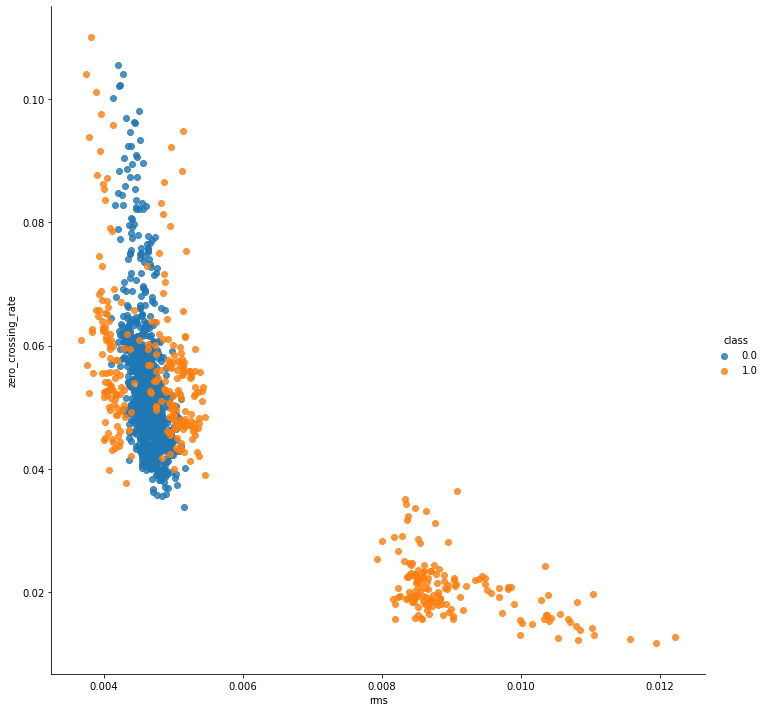

In [78]:
sns.lmplot(x='rms', y='zero_crossing_rate',  height=10, data=df,
           fit_reg=False, hue='class')

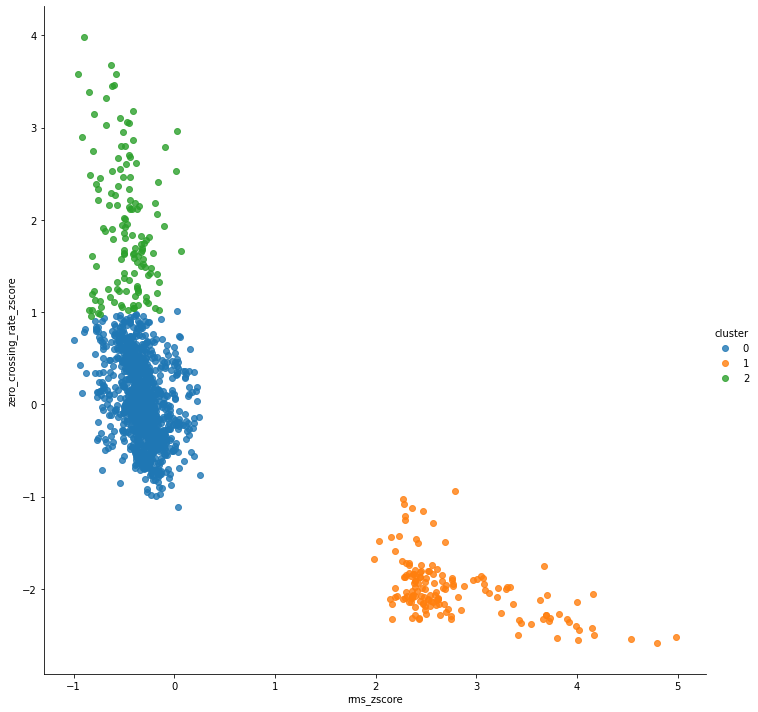

In [79]:
sns.lmplot(x='rms_zscore', y='zero_crossing_rate_zscore',  height=10, data=audio_metrics_normalized,
           fit_reg=False, hue='cluster')

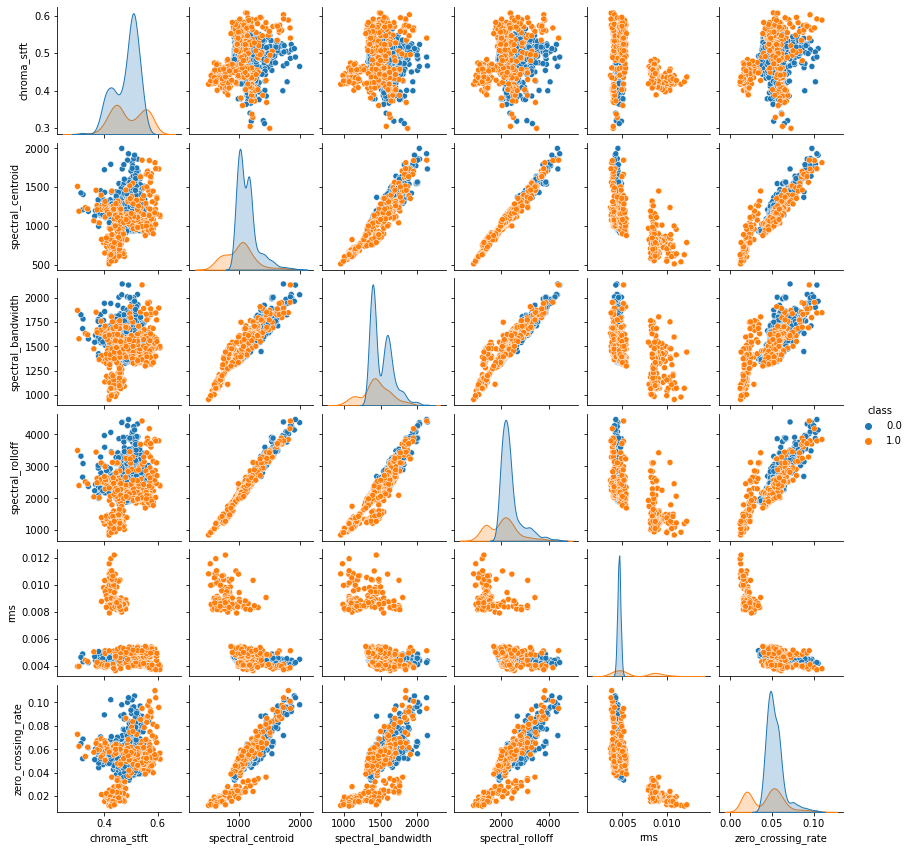

In [70]:
sns.pairplot(df, 
             hue = 'class', diag_kind = 'kde', 
             #plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 2);

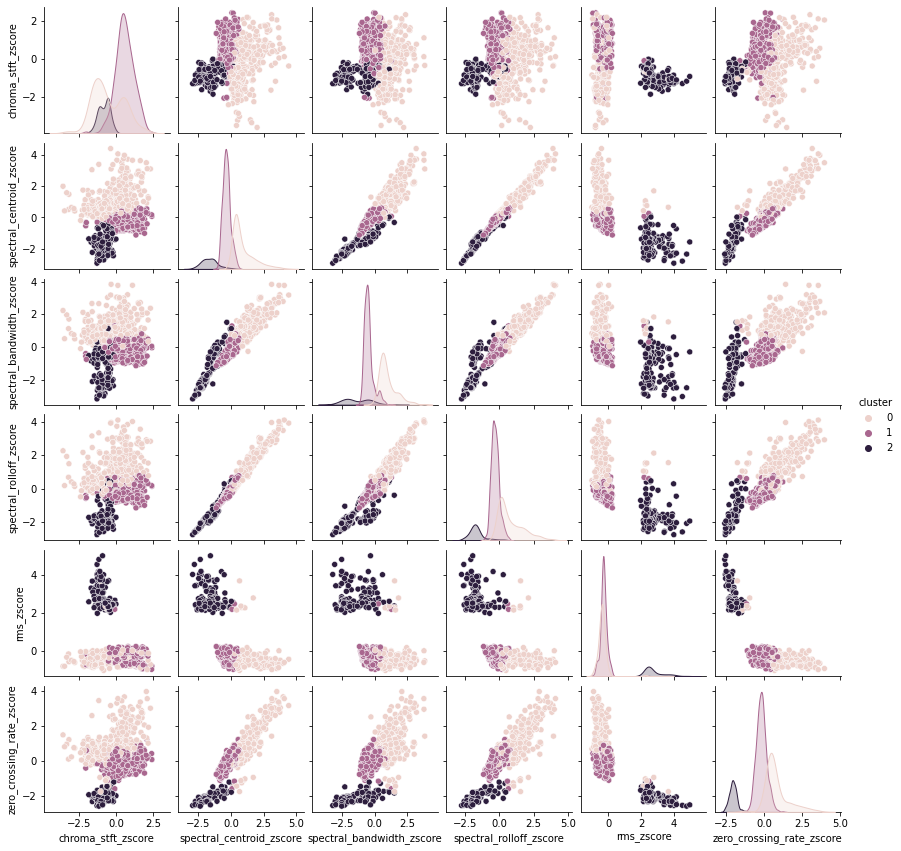

In [28]:
sns.pairplot(audio_metrics_normalized, 
             hue = 'cluster', diag_kind = 'kde', 
             height = 2);

In [12]:
df =df.drop('Unnamed: 0', axis=1)

In [44]:
from sklearn import metrics
true_labels = df['class']
pred_labels = audio_metrics_normalized['cluster']
print(metrics.homogeneity_score(true_labels, pred_labels))


print(metrics.completeness_score(true_labels, pred_labels))


#(1 stands for perfectly complete labeling)
print(metrics.v_measure_score(true_labels, pred_labels))


0.2391211836555156
0.15238340630839953
0.1861439248478918
